In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
sns.set_style('whitegrid')
mpl.rcParams['figure.figsize'] = [10.0, 7.0]

In [2]:
def dichotomy(f, a , b , eps=1e-10, max_iter_count=None):
    if f(a) * f(b) > 0:
        raise TypeError("dichotomy method is not applicable for this function: f(a)*f(b) > 0")
    
    def iteration(a,b,c):
        if f(c) * f(b) > 0:
            a = a
            b = c
        elif f(c) * f(b) < 0:
            a = c
            b = b
        c = (a + b) / 2
        return a, b, c
    
    c = (a + b) / 2
    a1, b1, c1 = iteration(a,b,c)
    iter_count = 1
    
    if max_iter_count is None:
        while abs(c1 - c) >= eps:
            iter_count += 1
            c = c1
            a1, b1, c1 = iteration(a1,b1,c1)
        
        return c1,iter_count
    else:
        while iter_count < max_iter_count:
            iter_count += 1
            c = c1
            a1, b1, c1 = iteration(a1,b1,c1)
            
        return c1, iter_count

In [3]:
def dichotomy_iter_count(b,a,eps=1e-10):
    return np.floor(np.log2((b - a) / eps))

In [4]:
def newton(f, a, b, eps=1e-10, fprime=None, max_iter_count=None):
    x0 = b
    x1 = x0 - f(x0) / fprime(x0)
    iter_count = 1
    
    if max_iter_count is None:
        while abs(x1 - x0) >= eps:
            iter_count += 1
            x0 = x1
            x1 = x0 - f(x0) / fprime(x0)

        return x1,iter_count
    else:
        while iter_count < max_iter_count:
            iter_count += 1
            x0 = x1
            x1 = x0 - f(x0) / fprime(x0)

        return x1,iter_count

In [5]:
def chord(f, a, b, eps=1e-10, max_iter_count=None):
    x0 = (a + b) / 2
    x1 = x0 - (b-a) / 10
    
    def iteration(x0,x1):
        x2 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
        return x2
        
    x2 = iteration(x0,x1)
    iter_count=1
    
    if max_iter_count is None:  
        while abs(x2 - x1) >= eps:
            iter_count += 1
            x0 = x1
            x1 = x2 
            x2 = iteration(x0,x1)

        return x2, iter_count
    else:
        while iter_count < max_iter_count:
            iter_count += 1
            x0 = x1
            x1 = x2 
            x2 = iteration(x0,x1)
            
        return x2, iter_count

In [6]:
def x_n(n,method,f,a,b,fprime=None):
    if fprime is None:
        return method(f,a,b,max_iter_count=n)[0]
    else:
        return method(f,a,b,fprime=fprime,max_iter_count=n)[0]

#### Уровень сходимости
$R\approx \frac{\log(\frac{{x_{n+1}} - {x_{n}}}{{x_{n}} - {x_{n-1}}})}
{\log(\frac{{x_{n}} - {x_{n-1}}}{{x_{n-1}} - {x_{n-2}}})}  $

In [7]:
def convergence_rate(n,method,f,a,b,fprime=None):
    def x_k(k):
        return x_n(k,method,f,a,b,fprime=fprime)
    
    return np.log(abs((x_k(n+1)-x_k(n))/(x_k(n)-x_k(n-1)))) /\
            np.log(abs((x_k(n)-x_k(n-1))/(x_k(n-1)-x_k(n-2)))) 

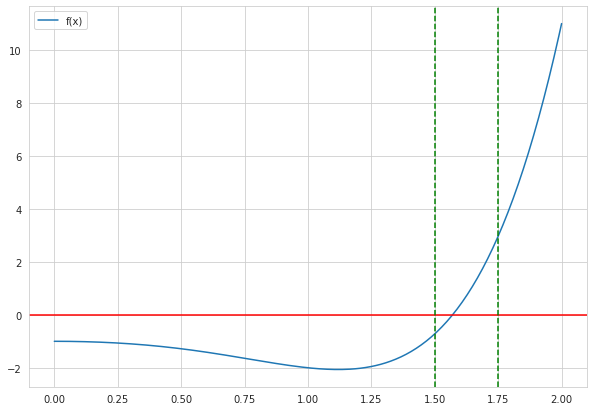

In [8]:
a, b = 0, 10

def f(x):
    return x**5 - x**4 - x**2 - 1

def g(x):
    return 5 * x**4 - 4 * x**3 - 2 * x

x = np.linspace(a,2,num=200)
plt.plot(x,f(x),label='f(x)')
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=1.50, color='g', linestyle='--')
plt.axvline(x=1.75, color='g', linestyle='--')
plt.legend()
plt.show()

In [11]:
epss = (1e-3,1e-6,1e-9)

for eps in epss:
    print(f"root = {dichotomy(f,a,b,eps)} with eps = {eps}, using dichotomy")
    print(f"root = {newton(f,a,b,eps,fprime=g)} with eps = {eps}, using newton")
    print(f"root = {chord(f,a,b,eps)} with eps = {eps}, using chord")

root = (1.5704345703125, 13) with eps = 0.001, using dichotomy
root = (1.570147312766808, 13) with eps = 0.001, using newton
root = (1.570147525682899, 12) with eps = 0.001, using chord
root = (1.5701478719711304, 23) with eps = 1e-06, using dichotomy
root = (1.5701473121960543, 14) with eps = 1e-06, using newton
root = (1.570147312220357, 13) with eps = 1e-06, using chord
root = (1.570147312595509, 33) with eps = 1e-09, using dichotomy
root = (1.5701473121960543, 14) with eps = 1e-09, using newton
root = (1.5701473121960543, 14) with eps = 1e-09, using chord


In [10]:
print(f"convergence rate for dichotomy = {convergence_rate(13,dichotomy,f,a,b)}")
print(f"convergence rate for newton = {convergence_rate(13,newton,f,a,b,fprime=g)}")
print(f"convergence rate for chord = {convergence_rate(13,chord,f,a,b)}")

convergence rate for dichotomy = 1.0
convergence rate for newton = 2.00090946621236
convergence rate for chord = 1.619006893709128
